In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

All the preprocessing steps remain the same

In [2]:
games_details=pd.read_csv('games_details.csv')
games=pd.read_csv('games.csv')
teams=pd.read_csv('teams.csv')
ranking=pd.read_csv('ranking.csv')

In [3]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [4]:
#The GAME_STATUS_TEXT columns doesn't seem to convey any information

games.drop(columns=['GAME_STATUS_TEXT'], inplace=True)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [5]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [6]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [7]:
games_details.isna().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

**Seems like all the players who haven't played in the game have 'NaN' in most of the statitstics. Nickname is only filled a couple of times and doesn't seem to be anyhow useful, so it will be removed. PLUS_MINUS statistic wasn't gathered 20 years ago, so that's why it also contains smaller number of not NaN cells**

In [8]:
#Checking how often players have NaN in minutes played column

print(games_details['MIN'].isna().sum())

print(games_details['MIN'].isna().sum()/games_details.shape[0])

print(games_details.loc[games_details['MIN']=='0'].shape[0])

print(games_details.loc[games_details['MIN']=='0:00'].shape[0])

109690
0.16405235796287324
85
95


**Out of 600k games_details rows 180 contain '0', and over 100k contain 'NaN', so we can assume NaN means the player played 0 seconds in the game, which happens quite often**

In [9]:
games_details['MIN'].value_counts()

MIN
5               1989
12:00           1788
24              1185
22              1123
21              1059
                ... 
12.000000:29       1
34.000000:50       1
22.000000:07       1
34.000000:52       1
54:48              1
Name: count, Length: 3802, dtype: int64

In [10]:
#Changing Minutes into numeric values

def mintonum(minutes):
    minutes=str(minutes)
    if ':' in minutes:
        minute, second=map(float, minutes.split(":"))
        return minute+(second/60)
    else:
        return float(minutes)

In [11]:
games_details['MIN']=games_details['MIN'].apply(mintonum)

In [12]:
games_details['MIN'].describe()

count    558938.000000
mean         22.909195
std          11.235262
min          -9.000000
25%          14.616667
50%          23.350000
75%          31.800000
max          96.000000
Name: MIN, dtype: float64

**Number of minutes played cannot be below 0, also, longest game aver played lasted 78 minutes, and it, without overtime, lasts 48 minutes, and no player has ever played more than 70 minutes in a game so number of minutes above this threshold are invalid data.**

In [13]:
games_details.loc[games_details['MIN']>=70]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
206860,10600102,1610612744,GSW,Golden State,101194,Anthony Roberson,NaN,NaN,NaN,78.0,...,0.0,3.0,3.0,1.0,2.0,0.0,1.0,1.0,20.0,NaN
206864,10600102,1610612744,GSW,Golden State,2693,Keith McLeod,NaN,NaN,NaN,86.0,...,0.0,1.0,1.0,2.0,4.0,0.0,4.0,4.0,2.0,NaN
206865,10600102,1610612744,GSW,Golden State,2440,Matt Barnes,NaN,NaN,NaN,96.0,...,2.0,5.0,7.0,1.0,1.0,1.0,1.0,4.0,10.0,NaN
208639,10600027,1610612766,CHA,Charlotte,2679,Matt Carroll,NaN,NaN,NaN,93.0,...,0.0,2.0,2.0,1.0,0.0,0.0,1.0,4.0,13.0,NaN
208640,10600027,1610612766,CHA,Charlotte,2056,Primoz Brezec,NaN,NaN,NaN,92.0,...,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,6.0,NaN
208641,10600027,1610612766,CHA,Charlotte,101109,Raymond Felton,NaN,NaN,NaN,79.0,...,2.0,4.0,6.0,5.0,2.0,1.0,5.0,1.0,20.0,NaN
208642,10600027,1610612766,CHA,Charlotte,200797,Ryan Hollins,NaN,NaN,NaN,84.0,...,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,10.0,NaN
208644,10600027,1610612766,CHA,Charlotte,200835,Walter Herrmann,NaN,NaN,NaN,72.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
208648,10600027,1610612749,MIL,Milwaukee,101111,Charlie Villanueva,NaN,NaN,NaN,89.0,...,1.0,2.0,3.0,5.0,0.0,0.0,3.0,6.0,9.0,NaN
208649,10600027,1610612749,MIL,Milwaukee,200840,Chris McCray,NaN,NaN,NaN,70.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,NaN


In [14]:
games_details.loc[games_details['MIN']>=70]['GAME_ID'].nunique()

2

In [15]:
games_details.loc[games_details['MIN']<0]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
139943,10800045,1610612745,HOU,Houston,201171,Carl Landry,NaN,NaN,NaN,-9.0,...,4.0,3.0,7.0,0.0,0.0,0.0,2.0,3.0,10.0,NaN
139944,10800045,1610612745,HOU,Houston,101236,Chuck Hayes,NaN,NaN,NaN,-5.0,...,1.0,4.0,5.0,0.0,1.0,1.0,0.0,0.0,4.0,NaN
139948,10800045,1610612745,HOU,Houston,1897,Metta World Peace,NaN,NaN,NaN,-7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,8.0,NaN
139950,10800045,1610612745,HOU,Houston,101144,Von Wafer,NaN,NaN,NaN,-3.0,...,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,6.0,NaN
139952,10800045,1610612760,OKC,Oklahoma City,101243,Chris Alexander,NaN,NaN,NaN,-8.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
139954,10800045,1610612760,OKC,Oklahoma City,2863,Damien Wilkins,NaN,NaN,NaN,-2.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,9.0,NaN
139955,10800045,1610612760,OKC,Oklahoma City,201182,Derrick Byars,NaN,NaN,NaN,-5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
139958,10800045,1610612760,OKC,Oklahoma City,101130,Johan Petro,NaN,NaN,NaN,-4.0,...,3.0,4.0,7.0,1.0,0.0,1.0,1.0,5.0,12.0,NaN
139959,10800045,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,NaN,-3.0,...,3.0,2.0,5.0,4.0,4.0,3.0,2.0,2.0,26.0,NaN
140132,10800035,1610612756,PHX,Phoenix,201169,Alando Tucker,NaN,NaN,NaN,-2.0,...,2.0,2.0,4.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN


In [16]:
games_details.loc[games_details['MIN']<0]['GAME_ID'].nunique()

2

In [17]:
#Seems that in both cases there is a problem with 2 games, let's investigate them

games_details.loc[games_details['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
139941,10800045,1610612745,HOU,Houston,201166,Aaron Brooks,NaN,NaN,NaN,0.0,...,0.0,1.0,1.0,3.0,0.0,0.0,3.0,3.0,20.0,NaN
139942,10800045,1610612745,HOU,Houston,699,Brent Barry,NaN,NaN,NaN,2.0,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,2.0,11.0,NaN
139943,10800045,1610612745,HOU,Houston,201171,Carl Landry,NaN,NaN,NaN,-9.0,...,4.0,3.0,7.0,0.0,0.0,0.0,2.0,3.0,10.0,NaN
139944,10800045,1610612745,HOU,Houston,101236,Chuck Hayes,NaN,NaN,NaN,-5.0,...,1.0,4.0,5.0,0.0,1.0,1.0,0.0,0.0,4.0,NaN
139945,10800045,1610612745,HOU,Houston,201199,DJ Strawberry,NaN,NaN,NaN,7.0,...,0.0,2.0,2.0,0.0,2.0,0.0,0.0,5.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208654,10600027,1610612749,MIL,Milwaukee,2696,Lynn Greer,NaN,NaN,NaN,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,NaN
208655,10600027,1610612749,MIL,Milwaukee,2072,Michael Redd,NaN,NaN,NaN,25.0,...,0.0,2.0,2.0,3.0,0.0,0.0,1.0,2.0,21.0,NaN
208656,10600027,1610612749,MIL,Milwaukee,200839,Mike Harris,NaN,NaN,NaN,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
208657,10600027,1610612749,MIL,Milwaukee,1739,Ruben Patterson,NaN,NaN,NaN,20.0,...,5.0,0.0,5.0,4.0,2.0,0.0,3.0,3.0,6.0,NaN


In [18]:
games.loc[games['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])]

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
12238,2008-10-13,10800045,1610612745,1610612760,2008,1610612745,104.0,0.446,0.846,0.348,19.0,40.0,1610612760,110.0,0.482,0.879,0.143,19.0,45.0,0
12245,2008-10-11,10800035,1610612756,1610612743,2008,1610612756,72.0,0.316,0.690,0.125,8.0,52.0,1610612743,77.0,0.362,0.474,0.091,7.0,51.0,0
15028,2006-10-24,10600102,1610612744,1610612757,2006,1610612744,108.0,0.537,0.591,0.389,28.0,39.0,1610612757,96.0,0.474,0.654,0.467,21.0,39.0,1
15088,2006-10-13,10600027,1610612766,1610612749,2006,1610612766,100.0,0.438,0.721,0.357,23.0,40.0,1610612749,104.0,0.452,0.700,0.438,21.0,38.0,0


**All of these games are preseason games, so it's extremely hard to find the true data. Also, removing these games probably won't cause a huge loss on the quality of the dataset, as the amount is very small. So, they will be removed. In dataframe games_details the whole games will be removed as their games seem to be completely incorrect**

In [19]:
print(games.shape)
print(games_details.shape)

(26651, 20)
(668628, 29)


In [20]:
index_games = games[games['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])].index
games.drop(index_games , inplace=True)
games.shape

(26647, 20)

In [21]:
index_games = games_details[games_details['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])].index
games_details.drop(index_games , inplace=True)
games_details.shape

(668539, 29)

In [22]:
#Investigating 'COMMENT' columns
games_details['COMMENT'][games_details['COMMENT'].notnull()]

13        DNP - Coach's Decision
51        DNP - Coach's Decision
62        DNP - Coach's Decision
63        DNP - Coach's Decision
64        DNP - Coach's Decision
                   ...          
665946    DNP - Coach's Decision
665958    DNP - Coach's Decision
665969    DNP - Coach's Decision
665970    DNP - Coach's Decision
665971    DNP - Coach's Decision
Name: COMMENT, Length: 109689, dtype: object

In [23]:
games_details['COMMENT'].value_counts()

COMMENT
DNP - Coach's Decision                      58054
DNP - Coach's Decision                      30547
DND - Injury/Illness                         1267
DNP - Injury/Illness                         1161
DNP - Injury/Illness                         1151
                                            ...  
DND - Strained rt. calf                         1
DND - Left Achilles Surgery.                    1
DND - Tendonitis Left Ankle                     1
DND - Right quadriceps strain                   1
DND - Non-Displaced Fracture, Left Fibul        1
Name: count, Length: 5348, dtype: int64

In [24]:
games_details.loc[(games_details['COMMENT'].notnull()) & (games_details['MIN'].isna())]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
13,22200477,1610612759,SAS,San Antonio,203476,Gorgui Dieng,Gorgui,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,22200478,1610612762,UTA,Utah,1630695,Micah Potter,Micah,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,22200466,1610612749,MIL,Milwaukee,203648,Thanasis Antetokounmpo,Thanasis,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,22200466,1610612749,MIL,Milwaukee,201588,George Hill,George,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,22200466,1610612749,MIL,Milwaukee,201586,Serge Ibaka,Serge,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665946,21200003,1610612747,LAL,Los Angeles,203135,Robert Sacre,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665958,21200001,1610612764,WAS,Washington,201858,Cartier Martin,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665969,21200001,1610612739,CLE,Cleveland,201956,Omri Casspi,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665970,21200001,1610612739,CLE,Cleveland,202720,Jon Leuer,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**As the dataframe length and number of comments is the same - it seems that every absence is explained and that's what the COMMENT column contains**

**Also, the abbreviation of the reasons of absences do not seem to be consistent as, for example DNP may mean INJURY/ILLNESS or Coach's Deision.**

**Usually, NBA players miss games due to medical issues, personal reasons or coach decision. Let's try to extract these 3 features.**

In [25]:
comments=games_details.loc[games_details['COMMENT'].notnull()]['COMMENT'].to_list()
comments_personal=[comment for comment in comments if 'personal' in comment.lower()]
print(f'Number of personal reasons: {len(comments_personal)}')
comments_coach=[comment for comment in comments if 'coach' in comment.lower()]
print(f"Number of coach's decisions: {len(comments_coach)}")

Number of personal reasons: 592
Number of coach's decisions: 88821


**Let's assume all the other abscences are due to injury, as many of them are very specified, and it will be extremely hard to go through them all.**

In [26]:
def com_to_abs(comment):
    if pd.notna(comment):
        if 'coach' in str(comment).lower():
            return "Coach's decision"
        elif 'personal' in str(comment).lower():
            return "Personal reasons"
        else:
            return "Injury"
    else:
        return np.nan

In [27]:
games_details['COMMENT']=games_details['COMMENT'].apply(com_to_abs)
games_details['COMMENT'].value_counts()

COMMENT
Coach's decision    88821
Injury              20276
Personal reasons      592
Name: count, dtype: int64

In [28]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18.100000,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31.016667,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21.700000,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30.333333,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27.733333,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [29]:
print(games['GAME_ID'].nunique(), games_details['GAME_ID'].nunique())

26618 26519


**There are some games that are in the games table but not in the games_details one. Let's investigate it.**

In [30]:
games_details_list=list(games_details['GAME_ID'].unique())
games_list=list(games['GAME_ID'].unique())

In [31]:
games_details.loc[~games_details['GAME_ID'].isin(games_list)]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS


In [32]:
games_not_details=games.loc[~games['GAME_ID'].isin(games_details_list)]
games_not_details

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
19175,2003-10-24,10300116,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,NaN,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
19176,2003-10-24,10300108,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,NaN,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
19177,2003-10-24,10300109,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,NaN,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
19178,2003-10-24,10300113,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
19179,2003-10-24,10300112,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,NaN,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19269,2003-10-09,10300019,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,NaN,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
19270,2003-10-09,10300022,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,NaN,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
19271,2003-10-08,10300013,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
19278,2003-10-08,10300015,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,NaN,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


**So, there are 99 games, that are not in games_details table but they appear in games table. Let's exclude them for consistent data**

In [33]:
games_not_details_list=list(games_not_details["GAME_ID"])
games=games.loc[~games['GAME_ID'].isin(games_not_details_list)]
games["GAME_ID"].nunique()

26519

**Let's assign season to each game. For easier computation, the "SEASON" column is represented by the year of the season ending**

In [34]:
for index, row in games.iterrows():
    year=str(games.at[index, 'GAME_DATE_EST'])[:4]
    month=str(games.at[index, 'GAME_DATE_EST'])[5:7]
    if int(month)>9:
        games.at[index, 'SEASON']=int(year)+1
    else:
        games.at[index, 'SEASON']=int(year) 

In [35]:
games["SEASON"].value_counts()

SEASON
2006    1432
2014    1427
2010    1424
2009    1423
2011    1422
2013    1420
2015    1418
2007    1417
2016    1416
2008    1411
2017    1407
2022    1390
2018    1387
2019    1371
2005    1362
2004    1286
2021    1254
2020    1236
2012    1104
2023     541
Name: count, dtype: int64

In [36]:
games_details = pd.merge(games_details, games[['GAME_ID', 'SEASON']], on='GAME_ID')
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18.100000,...,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2023
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31.016667,...,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2023
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21.700000,...,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2023
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30.333333,...,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2023
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27.733333,...,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2023


In [37]:
games_details["SEASON"].value_counts() #Seems that everything went fine

SEASON
2015    37244
2016    37160
2017    37053
2014    36386
2022    36376
2013    36198
2018    35910
2019    35082
2021    34711
2006    34521
2010    34175
2007    34100
2009    34095
2011    34091
2008    33917
2005    32601
2020    32138
2004    30703
2012    28391
2023    14619
Name: count, dtype: int64

In [38]:
ranking["SEASON_ID"].value_counts()

SEASON_ID
22010    12480
22019    12240
22018    10470
22017    10380
22021    10380
22004    10260
22009    10230
22007    10230
22013    10200
22006    10200
22012    10200
22016    10200
22015    10200
22014    10170
22003    10150
22005    10140
22008    10140
22020     8573
22011     8550
22022     1980
12019      900
12006      780
12009      780
12015      750
12012      750
12014      720
12007      720
12016      720
12013      720
12008      690
12010      690
12003      667
12005      660
12004      630
12022      540
12018      540
12017      510
12021      480
12020      336
12011      270
22002      116
Name: count, dtype: int64

In [39]:
games_details['SEASON']=games_details["SEASON"].astype(int)
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18.100000,...,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2023
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31.016667,...,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2023
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21.700000,...,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2023
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30.333333,...,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2023
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27.733333,...,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2023


**A seasons start in year X, and finish in year X+1, the first digit defines whether it's the first part of the season or the second one, and the latter four define the year. The results seem relevant, as the number of games played in the last part of the starting year is significantly smaller than the amount of matches in the second part of the season**


In [40]:
print(games_details["PLAYER_ID"].nunique(), games_details["PLAYER_NAME"].nunique())

2687 2664


In [41]:
games

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2023,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,1610612762,1610612764,2023,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,1610612739,1610612749,2023,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,1610612755,1610612765,2023,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,1610612737,1610612741,2023,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,1610612737,1610612740,2015,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,1610612741,1610612764,2015,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,1610612747,1610612743,2015,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,1610612761,1610612758,2015,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [42]:
# Dropping columns which describe the game and outcome

games.drop(games.columns[5:19], axis=1, inplace=True)

In [43]:
games.head()

games_target=games['HOME_TEAM_WINS']

In [44]:
for index, row in ranking.iterrows():
    year=str(ranking.at[index, 'STANDINGSDATE'])[:4]
    month=str(ranking.at[index, 'STANDINGSDATE'])[5:7]
    if int(month)>9:
        ranking.at[index, 'SEASON']=int(int(year)+1)
    else:
        ranking.at[index, 'SEASON']=int(year) 

In [45]:
# Dropping duplicates of ranking to avoid confusion 

ranking.drop_duplicates(subset=['TEAM_ID', 'STANDINGSDATE'], inplace=True)

In [46]:
ranking['STANDINGSDATE'].value_counts()

STANDINGSDATE
2022-12-22    30
2005-08-07    30
2005-07-28    30
2005-07-29    30
2005-07-30    30
              ..
2004-05-20    29
2004-05-21    29
2004-05-22    29
2004-05-23    29
2004-06-12    29
Name: count, Length: 7023, dtype: int64

In [47]:
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,SEASON
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN,2023.0
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN,2023.0
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN,2023.0
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN,2023.0
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN,2014.0
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN,2014.0
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN,2014.0
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN,2014.0


In [48]:
games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2023,1
1,2022-12-22,22200478,1610612762,1610612764,2023,1
2,2022-12-21,22200466,1610612739,1610612749,2023,1
3,2022-12-21,22200467,1610612755,1610612765,2023,1
4,2022-12-21,22200468,1610612737,1610612741,2023,0


In [49]:
# Adding games won and lost by home team

games = pd.merge(games, ranking[['W', 'L', 'TEAM_ID','STANDINGSDATE', 'SEASON']], how='left', left_on=['HOME_TEAM_ID', 'GAME_DATE_EST', 'SEASON'], right_on=['TEAM_ID', 'STANDINGSDATE', 'SEASON'])

games['HOME_TEAM_SEASON_WINS']=games['W']

games['HOME_TEAM_SEASON_LOSSES']=games['L']

games.drop(games.columns[-6:-2], axis=1, inplace=True)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES
0,2022-12-22,22200477,1610612740,1610612759,2023,1,19,12
1,2022-12-22,22200478,1610612762,1610612764,2023,1,19,16
2,2022-12-21,22200466,1610612739,1610612749,2023,1,22,11
3,2022-12-21,22200467,1610612755,1610612765,2023,1,18,12
4,2022-12-21,22200468,1610612737,1610612741,2023,0,16,16


In [50]:
# Adding games won and lost by away team

games = pd.merge(games, ranking[['W', 'L', 'TEAM_ID','STANDINGSDATE', 'SEASON']], how='left', left_on=['VISITOR_TEAM_ID', 'GAME_DATE_EST', 'SEASON'], right_on=['TEAM_ID', 'STANDINGSDATE', 'SEASON'])

games['VISITOR_TEAM_SEASON_WINS']=games['W']

games['VISITOR_TEAM_SEASON_LOSSES']=games['L']

games.drop(games.columns[-6:-2], axis=1, inplace=True)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES
0,2022-12-22,22200477,1610612740,1610612759,2023,1,19,12,10,21
1,2022-12-22,22200478,1610612762,1610612764,2023,1,19,16,12,21
2,2022-12-21,22200466,1610612739,1610612749,2023,1,22,11,22,9
3,2022-12-21,22200467,1610612755,1610612765,2023,1,18,12,8,26
4,2022-12-21,22200468,1610612737,1610612741,2023,0,16,16,13,18


In [51]:
# Changing type o date column

games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

games=games.sort_values('GAME_DATE_EST', ascending=False)

games.reset_index(inplace=True)

games.drop(columns='index', inplace=True)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES
0,2022-12-22,22200477,1610612740,1610612759,2023,1,19,12,10,21
1,2022-12-22,22200478,1610612762,1610612764,2023,1,19,16,12,21
2,2022-12-21,22200466,1610612739,1610612749,2023,1,22,11,22,9
3,2022-12-21,22200472,1610612745,1610612753,2023,0,9,22,12,21
4,2022-12-21,22200476,1610612746,1610612766,2023,1,19,14,8,24


In [ ]:
# Adding the days since last game for each team column

%%time

games['HOME_TEAM_BREAK']=None

games['VISITOR_TEAM_BREAK']=None

for index, row in games.iterrows():
    
    home=row['HOME_TEAM_ID']
    
    away=row['VISITOR_TEAM_ID']
    
    if index<games.shape[0]:
    
        for index_2, row_2 in games.iloc[index+1:].iterrows():
        
            if home==row_2['HOME_TEAM_ID'] or home==row_2['VISITOR_TEAM_ID']:
                
                if (row['GAME_DATE_EST'] - row_2['GAME_DATE_EST']).days<10:

                    games.at[index, 'HOME_TEAM_BREAK']=(row['GAME_DATE_EST'] - row_2['GAME_DATE_EST']).days
            
                else:
                    
                    games.at[index, 'HOME_TEAM_BREAK']=10 # If the break was bigger than 10 - set it at 10
                    
                break
                
        for index_3, row_3 in games.iloc[index+1:].iterrows():
        
            if away==row_3['HOME_TEAM_ID'] or away==row_3['VISITOR_TEAM_ID']:
                
                if (row['GAME_DATE_EST'] - row_3['GAME_DATE_EST']).days<10:

                    games.at[index, 'VISITOR_TEAM_BREAK']=(row['GAME_DATE_EST'] - row_3['GAME_DATE_EST']).days
            
                else:
                    
                    games.at[index, 'HOME_TEAM_BREAK']=10 # If the break was bigger than 10 - set it at 10
                    
                break
            
    
games.head()

In [ ]:
# Saving the dataframe to avoid repeating calculations every time the code is run

games.to_csv('games_altered.csv')

In [52]:
games=pd.read_csv('games_altered.csv')

games=games.iloc[:,1:]

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK
0,2022-12-22,22200477,1610612740,1610612759,2023,1,19,12,10,21,3.0,3.0
1,2022-12-22,22200478,1610612762,1610612764,2023,1,19,16,12,21,2.0,2.0
2,2022-12-21,22200466,1610612739,1610612749,2023,1,22,11,22,9,2.0,2.0
3,2022-12-21,22200472,1610612745,1610612753,2023,0,9,22,12,21,2.0,2.0
4,2022-12-21,22200476,1610612746,1610612766,2023,1,19,14,8,24,4.0,2.0


In [53]:
games.isnull().sum()

GAME_DATE_EST                   0
GAME_ID                         0
HOME_TEAM_ID                    0
VISITOR_TEAM_ID                 0
SEASON                          0
HOME_TEAM_WINS                  0
HOME_TEAM_SEASON_WINS           0
HOME_TEAM_SEASON_LOSSES         0
VISITOR_TEAM_SEASON_WINS        0
VISITOR_TEAM_SEASON_LOSSES      0
HOME_TEAM_BREAK                16
VISITOR_TEAM_BREAK            341
dtype: int64

In [54]:
print(games['HOME_TEAM_BREAK'].mean(), games['VISITOR_TEAM_BREAK'].mean())

2.4079225086687774 2.065020795970542


In [55]:
# As for some games the break time was not calculated, the average of 2 days was selected to deal with it 

games.fillna(2, inplace=True)

In [56]:
# Unifying team names

team_dict={'LA Lakers': 'L.A. Lakers', 'LA Clippers': 'L.A. Clippers', "New Orleans/Oklahoma City":'New Orleans', 'New Jersey':'Brooklyn'}

ranking['TEAM']=ranking['TEAM'].replace(team_dict)

ranking['TEAM'].value_counts()

TEAM
Denver           7023
Memphis          7023
Detroit          7023
Washington       7023
Orlando          7023
Chicago          7023
Toronto          7023
Miami            7023
Indiana          7023
Atlanta          7023
New York         7023
Philadelphia     7023
Brooklyn         7023
Cleveland        7023
Boston           7023
Milwaukee        7023
Houston          7023
San Antonio      7023
L.A. Lakers      7023
Golden State     7023
Minnesota        7023
Dallas           7023
Portland         7023
Utah             7023
Sacramento       7023
L.A. Clippers    7023
Phoenix          7023
New Orleans      7023
Charlotte        6646
Oklahoma City    5192
Seattle          1831
Name: count, dtype: int64

In [57]:
# Creating dictionary with win percentage for every team in each season

team_season_dict={}

for index, row in ranking.iterrows():
    
    if row['TEAM']=='Seattle':
        
        team='Oklahoma City'
        
    else:
        
        team=row['TEAM']
    
    if row['SEASON']==2021:
        
        if row['G']==72:
    
            if (team, row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(team, row['SEASON'])]=row['W_PCT']
    
    elif row['SEASON']==2020:
        
        if row['G']==64:
    
            if (team, row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(team, row['SEASON'])]=row['W_PCT']
            
            
    elif row['SEASON']==2013:
        
        if team=='Boston' or team=='Indiana':
            
            if row['G']==81:
                
                if (team, row['SEASON']) in team_season_dict.keys():

                    continue

                else:

                    team_season_dict[(team, row['SEASON'])]=row['W_PCT']
        
        elif row['G']==82:
    
            if (team, row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(team, row['SEASON'])]=row['W_PCT']
    
    else:
        
        if row['G']==82:
    
            if (team, row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(team, row['SEASON'])]=row['W_PCT']

team_season_dict

{('Phoenix', 2022.0): 0.78,
 ('Memphis', 2022.0): 0.683,
 ('Golden State', 2022.0): 0.646,
 ('Dallas', 2022.0): 0.634,
 ('Utah', 2022.0): 0.598,
 ('Denver', 2022.0): 0.585,
 ('Minnesota', 2022.0): 0.561,
 ('L.A. Clippers', 2022.0): 0.512,
 ('New Orleans', 2022.0): 0.439,
 ('San Antonio', 2022.0): 0.415,
 ('L.A. Lakers', 2022.0): 0.402,
 ('Sacramento', 2022.0): 0.366,
 ('Portland', 2022.0): 0.329,
 ('Oklahoma City', 2022.0): 0.293,
 ('Houston', 2022.0): 0.244,
 ('Miami', 2022.0): 0.646,
 ('Boston', 2022.0): 0.622,
 ('Milwaukee', 2022.0): 0.622,
 ('Philadelphia', 2022.0): 0.622,
 ('Toronto', 2022.0): 0.585,
 ('Chicago', 2022.0): 0.561,
 ('Brooklyn', 2022.0): 0.537,
 ('Cleveland', 2022.0): 0.537,
 ('Atlanta', 2022.0): 0.524,
 ('Charlotte', 2022.0): 0.524,
 ('New York', 2022.0): 0.451,
 ('Washington', 2022.0): 0.427,
 ('Indiana', 2022.0): 0.305,
 ('Detroit', 2022.0): 0.28,
 ('Orlando', 2022.0): 0.268,
 ('Utah', 2021.0): 0.722,
 ('Phoenix', 2021.0): 0.708,
 ('Denver', 2021.0): 0.653,
 ('L.A

In [58]:
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,SEASON
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN,2023.0
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN,2023.0
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN,2023.0
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN,2023.0
4,1610612746,0,22022,2022-12-22,West,L.A. Clippers,33,19,14,0.576,11-7,8-7,NaN,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN,2014.0
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN,2014.0
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN,2014.0
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN,2014.0


In [59]:
team_id_dict=ranking.set_index('TEAM_ID')['TEAM'].to_dict()

team_id_dict

{1610612743: 'Denver',
 1610612763: 'Memphis',
 1610612740: 'New Orleans',
 1610612756: 'Phoenix',
 1610612746: 'L.A. Clippers',
 1610612758: 'Sacramento',
 1610612762: 'Utah',
 1610612757: 'Portland',
 1610612742: 'Dallas',
 1610612750: 'Minnesota',
 1610612744: 'Golden State',
 1610612760: 'Oklahoma City',
 1610612747: 'L.A. Lakers',
 1610612759: 'San Antonio',
 1610612745: 'Houston',
 1610612749: 'Milwaukee',
 1610612738: 'Boston',
 1610612739: 'Cleveland',
 1610612751: 'Brooklyn',
 1610612755: 'Philadelphia',
 1610612752: 'New York',
 1610612737: 'Atlanta',
 1610612754: 'Indiana',
 1610612748: 'Miami',
 1610612761: 'Toronto',
 1610612741: 'Chicago',
 1610612753: 'Orlando',
 1610612764: 'Washington',
 1610612766: 'Charlotte',
 1610612765: 'Detroit'}

In [60]:
games[['HOME_TEAM_ID', 'VISITOR_TEAM_ID']]=games.apply(lambda row: row[['HOME_TEAM_ID', 'VISITOR_TEAM_ID']].map(team_id_dict), axis=1)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK
0,2022-12-22,22200477,New Orleans,San Antonio,2023,1,19,12,10,21,3.0,3.0
1,2022-12-22,22200478,Utah,Washington,2023,1,19,16,12,21,2.0,2.0
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,1,22,11,22,9,2.0,2.0
3,2022-12-21,22200472,Houston,Orlando,2023,0,9,22,12,21,2.0,2.0
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,1,19,14,8,24,4.0,2.0


In [61]:
# Adding columns with data about both home and visitor performance in last 2 seasons

games['HOME_TEAM_LAST_SEASON_W_PCT']=None

games['VISITOR_TEAM_LAST_SEASON_W_PCT']=None

games['HOME_TEAM_2_SEASONS_AGO_W_PCT']=None

games['VISITOR_TEAM_2_SEASONS_AGO_W_PCT']=None

for index, row in games.iterrows():
    
    try:
        
        games.at[index, 'HOME_TEAM_LAST_SEASON_W_PCT']=round(team_season_dict[(row['HOME_TEAM_ID'], row['SEASON']-1)], 2)
        
    except:
        
        games.at[index, 'HOME_TEAM_LAST_SEASON_W_PCT']=round(team_season_dict[(row['HOME_TEAM_ID'], row['SEASON'])], 2)
        
    try:
        
        games.at[index, 'VISITOR_TEAM_LAST_SEASON_W_PCT']=round(team_season_dict[(row['VISITOR_TEAM_ID'], row['SEASON']-1)], 2)
        
    except:
        
        games.at[index, 'VISITOR_TEAM_LAST_SEASON_W_PCT']=round(team_season_dict[(row['VISITOR_TEAM_ID'], row['SEASON'])], 2)
        
    try:
        
        games.at[index, 'HOME_TEAM_2_SEASONS_AGO_W_PCT']=round(team_season_dict[(row['HOME_TEAM_ID'], row['SEASON']-2)], 2)
        
    except:
        
        games.at[index, 'HOME_TEAM_2_SEASONS_AGO_W_PCT']=round(team_season_dict[(row['HOME_TEAM_ID'], row['SEASON'])], 2)
        
    try:
        
        games.at[index, 'VISITOR_TEAM_2_SEASONS_AGO_W_PCT']=round(team_season_dict[(row['VISITOR_TEAM_ID'], row['SEASON']-2)], 2)
        
    except:
        
        games.at[index, 'VISITOR_TEAM_2_SEASONS_AGO_W_PCT']=round(team_season_dict[(row['VISITOR_TEAM_ID'], row['SEASON'])], 2)
        
games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,VISITOR_TEAM_2_SEASONS_AGO_W_PCT
0,2022-12-22,22200477,New Orleans,San Antonio,2023,1,19,12,10,21,3.0,3.0,0.44,0.41,0.43,0.46
1,2022-12-22,22200478,Utah,Washington,2023,1,19,16,12,21,2.0,2.0,0.6,0.43,0.72,0.47
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,1,22,11,22,9,2.0,2.0,0.54,0.62,0.31,0.64
3,2022-12-21,22200472,Houston,Orlando,2023,0,9,22,12,21,2.0,2.0,0.24,0.27,0.24,0.29
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,1,19,14,8,24,4.0,2.0,0.51,0.52,0.65,0.46


In [ ]:
# Creating columns checking if the last game was won by each team

%%time

games['HOME_TEAM_LAST_GAME_WON']=0

games['VISITOR_TEAM_LAST_GAME_WON']=0

for index, row in games.iterrows():
    
    home=row['HOME_TEAM_ID']
    
    away=row['VISITOR_TEAM_ID']
    
    if index<games.shape[0]:
    
        for index_2, row_2 in games.iloc[index+1:].iterrows():
                
            if home==row_2['HOME_TEAM_ID']:
                
                if row_2['HOME_TEAM_WINS']==1:
                    
                    games.at[index, 'HOME_TEAM_LAST_GAME_WON']=1
                    
                else:
                    
                    games.at[index, 'HOME_TEAM_LAST_GAME_WON']=0
                        
                break
                
            if home==row_2['VISITOR_TEAM_ID']:
                
                if row_2['HOME_TEAM_WINS']==1:
                    
                    games.at[index, 'HOME_TEAM_LAST_GAME_WON']=0
                    
                else:
                    
                    games.at[index, 'HOME_TEAM_LAST_GAME_WON']=1
                        
                break
                
        for index_3, row_3 in games.iloc[index+1:].iterrows():
                
            if away==row_3['HOME_TEAM_ID']:
                
                if row_3['HOME_TEAM_WINS']==1:
                    
                    games.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=1
                    
                else:
                    
                    games.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=0
                        
                break
                
            if away==row_3['VISITOR_TEAM_ID']:
                
                if row_3['HOME_TEAM_WINS']==1:
                    
                    games.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=0
                    
                else:
                    
                    games.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=1
                        
                break
            
    
games.head()

In [ ]:
# Creating columns checking last 5 games win percentage by each team

%%time

games['HOME_TEAM_LAST_5_GAMES_W_PCT']=0.5

games['VISITOR_TEAM_LAST_5_GAMES_W_PCT']=0.5

for index, row in games.iterrows():
    
    home=row['HOME_TEAM_ID']
    
    home_score=0
    
    away=row['VISITOR_TEAM_ID']
    
    away_score=0
    
    i=0
    
    if index<games.shape[0]:
    
        for index_2, row_2 in games.iloc[index+1:].iterrows():
                
            if home==row_2['HOME_TEAM_ID']:
                
                if row_2['HOME_TEAM_WINS']==1:
                    
                    home_score+=0.2
                    
                i+=1
                
            if home==row_2['VISITOR_TEAM_ID']:
                
                if row_2['HOME_TEAM_WINS']==0:
                    
                    home_score+=0.2
                    
                i+=1
                
            if i==5:
                    
                break
                
        for index_3, row_3 in games.iloc[index+1:].iterrows():
                
            if away==row_3['HOME_TEAM_ID']:
                
                if row_3['HOME_TEAM_WINS']==1:
                    
                    away_score+=0.2
                    
                i+=1
                
            if away==row_3['VISITOR_TEAM_ID']:
                
                if row_3['HOME_TEAM_WINS']==0:
                    
                    away_score+=0.2
                    
                i+=1
                
            if i==10:
                    
                break
                
        games.at[index, 'HOME_TEAM_LAST_5_GAMES_W_PCT']=home_score
        
        games.at[index, 'VISITOR_TEAM_LAST_5_GAMES_W_PCT']=away_score
        
        if index==26400:
            
            break
            
    
games.head()

In [ ]:
# Creating columns checking last 10 games win percentage by each team

%%time

games['HOME_TEAM_LAST_10_GAMES_W_PCT']=0.5

games['VISITOR_TEAM_LAST_10_GAMES_W_PCT']=0.5

for index, row in games.iterrows():
    
    home=row['HOME_TEAM_ID']
    
    home_score=0
    
    away=row['VISITOR_TEAM_ID']
    
    away_score=0
    
    i=0
    
    if index<games.shape[0]:
    
        for index_2, row_2 in games.iloc[index+1:].iterrows():
                
            if home==row_2['HOME_TEAM_ID']:
                
                if row_2['HOME_TEAM_WINS']==1:
                    
                    home_score+=0.1
                    
                i+=1
                
            if home==row_2['VISITOR_TEAM_ID']:
                
                if row_2['HOME_TEAM_WINS']==0:
                    
                    home_score+=0.1
                    
                i+=1
                
            if i==10:
                    
                break
                
        for index_3, row_3 in games.iloc[index+1:].iterrows():
                
            if away==row_3['HOME_TEAM_ID']:
                
                if row_3['HOME_TEAM_WINS']==1:
                    
                    away_score+=0.1
                    
                i+=1
                
            if away==row_3['VISITOR_TEAM_ID']:
                
                if row_3['HOME_TEAM_WINS']==0:
                    
                    away_score+=0.1
                    
                i+=1
                
            if i==20:
                    
                break
                
        games.at[index, 'HOME_TEAM_LAST_10_GAMES_W_PCT']=home_score
        
        games.at[index, 'VISITOR_TEAM_LAST_10_GAMES_W_PCT']=away_score
        
        if index==26250:
            
            break
            
    
games.head()

In [ ]:
# Saving the dataframe to avoid repeating calculations every time the code is run

games.to_csv('games_altered_2.csv')

In [62]:
games=pd.read_csv('games_altered_2.csv')

games=games.iloc[:,1:]

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES,...,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,VISITOR_TEAM_2_SEASONS_AGO_W_PCT,HOME_TEAM_LAST_GAME_WON,VISITOR_TEAM_LAST_GAME_WON,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT
0,2022-12-22,22200477,New Orleans,San Antonio,2023,1,19,12,10,21,...,0.44,0.41,0.43,0.46,0,1,0.2,0.6,0.6,0.4
1,2022-12-22,22200478,Utah,Washington,2023,1,19,16,12,21,...,0.60,0.43,0.72,0.47,1,1,0.6,0.2,0.5,0.1
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,1,22,11,22,9,...,0.54,0.62,0.31,0.64,1,1,0.8,0.6,0.7,0.7
3,2022-12-21,22200472,Houston,Orlando,2023,0,9,22,12,21,...,0.24,0.27,0.24,0.29,0,0,0.4,0.8,0.4,0.6
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,1,19,14,8,24,...,0.51,0.52,0.65,0.46,1,1,0.8,0.2,0.5,0.2


In [63]:
# Creating dict with win percentage of each team at home in last 20 years

team_home_w_pct={}

for team in games['HOME_TEAM_ID'].unique():
    
    wins=0
    
    matches=0
    
    for index, row in games.loc[games['HOME_TEAM_ID']==team].iterrows():
        
        if (row['HOME_TEAM_ID']==team) and (row['HOME_TEAM_WINS']==1):
        
            wins+=1
            
        matches+=1
        
        
    team_home_w_pct[team]=round(wins/matches, 3)

    
team_home_w_pct

{'New Orleans': 0.548,
 'Utah': 0.66,
 'Cleveland': 0.603,
 'Houston': 0.638,
 'L.A. Clippers': 0.599,
 'Sacramento': 0.498,
 'Oklahoma City': 0.602,
 'Minnesota': 0.474,
 'Philadelphia': 0.543,
 'New York': 0.474,
 'Atlanta': 0.572,
 'Brooklyn': 0.512,
 'Boston': 0.637,
 'Miami': 0.661,
 'Phoenix': 0.579,
 'Denver': 0.676,
 'Detroit': 0.57,
 'Indiana': 0.622,
 'Toronto': 0.596,
 'L.A. Lakers': 0.596,
 'Milwaukee': 0.58,
 'San Antonio': 0.731,
 'Charlotte': 0.492,
 'Chicago': 0.578,
 'Dallas': 0.657,
 'Memphis': 0.6,
 'Orlando': 0.524,
 'Portland': 0.604,
 'Washington': 0.531,
 'Golden State': 0.67}

In [64]:
# Creating dict with win percentage of each team as visitor in last 20 years

team_away_w_pct={}

for team in games['VISITOR_TEAM_ID'].unique():
    
    wins=0
    
    matches=0
    
    for index, row in games.loc[games['VISITOR_TEAM_ID']==team].iterrows():
        
        if (row['VISITOR_TEAM_ID']==team) and (row['HOME_TEAM_WINS']==0):
        
            wins+=1
            
        matches+=1
        
        
    team_away_w_pct[team]=round(wins/matches, 3)
    
        
team_away_w_pct

{'San Antonio': 0.537,
 'Washington': 0.336,
 'Milwaukee': 0.384,
 'Orlando': 0.369,
 'Charlotte': 0.308,
 'L.A. Lakers': 0.43,
 'Portland': 0.387,
 'Dallas': 0.486,
 'Detroit': 0.38,
 'Toronto': 0.434,
 'Chicago': 0.424,
 'Golden State': 0.454,
 'Indiana': 0.412,
 'Memphis': 0.407,
 'Utah': 0.42,
 'New York': 0.342,
 'Brooklyn': 0.381,
 'New Orleans': 0.375,
 'Miami': 0.471,
 'Atlanta': 0.366,
 'Sacramento': 0.33,
 'Minnesota': 0.334,
 'Denver': 0.442,
 'Phoenix': 0.457,
 'Cleveland': 0.415,
 'Boston': 0.484,
 'Oklahoma City': 0.439,
 'L.A. Clippers': 0.433,
 'Houston': 0.475,
 'Philadelphia': 0.37}

In [65]:
# Normalizing home win percentage with away win percentage

team_home_w_pct_norm={}

for key, value in team_home_w_pct.items():
    
    team_home_w_pct_norm[key]=round(team_home_w_pct[key]/team_away_w_pct[key], 2)
    
team_home_w_pct_norm

{'New Orleans': 1.46,
 'Utah': 1.57,
 'Cleveland': 1.45,
 'Houston': 1.34,
 'L.A. Clippers': 1.38,
 'Sacramento': 1.51,
 'Oklahoma City': 1.37,
 'Minnesota': 1.42,
 'Philadelphia': 1.47,
 'New York': 1.39,
 'Atlanta': 1.56,
 'Brooklyn': 1.34,
 'Boston': 1.32,
 'Miami': 1.4,
 'Phoenix': 1.27,
 'Denver': 1.53,
 'Detroit': 1.5,
 'Indiana': 1.51,
 'Toronto': 1.37,
 'L.A. Lakers': 1.39,
 'Milwaukee': 1.51,
 'San Antonio': 1.36,
 'Charlotte': 1.6,
 'Chicago': 1.36,
 'Dallas': 1.35,
 'Memphis': 1.47,
 'Orlando': 1.42,
 'Portland': 1.56,
 'Washington': 1.58,
 'Golden State': 1.48}

In [66]:
# Normalizing away win percentage with home win percentage

team_away_w_pct_norm={}

for key, value in team_away_w_pct.items():
    
    team_away_w_pct_norm[key]=round(team_away_w_pct[key]/team_home_w_pct[key], 2)
    
team_away_w_pct_norm

{'San Antonio': 0.73,
 'Washington': 0.63,
 'Milwaukee': 0.66,
 'Orlando': 0.7,
 'Charlotte': 0.63,
 'L.A. Lakers': 0.72,
 'Portland': 0.64,
 'Dallas': 0.74,
 'Detroit': 0.67,
 'Toronto': 0.73,
 'Chicago': 0.73,
 'Golden State': 0.68,
 'Indiana': 0.66,
 'Memphis': 0.68,
 'Utah': 0.64,
 'New York': 0.72,
 'Brooklyn': 0.74,
 'New Orleans': 0.68,
 'Miami': 0.71,
 'Atlanta': 0.64,
 'Sacramento': 0.66,
 'Minnesota': 0.7,
 'Denver': 0.65,
 'Phoenix': 0.79,
 'Cleveland': 0.69,
 'Boston': 0.76,
 'Oklahoma City': 0.73,
 'L.A. Clippers': 0.72,
 'Houston': 0.74,
 'Philadelphia': 0.68}

In [67]:
games['HOME_TEAM_HOME_W_PCT_NORM']=games['HOME_TEAM_ID'].map(team_home_w_pct_norm)

games['VISITOR_TEAM_AWAY_W_PCT_NORM']=games['VISITOR_TEAM_ID'].map(team_away_w_pct_norm)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES,...,HOME_TEAM_2_SEASONS_AGO_W_PCT,VISITOR_TEAM_2_SEASONS_AGO_W_PCT,HOME_TEAM_LAST_GAME_WON,VISITOR_TEAM_LAST_GAME_WON,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM
0,2022-12-22,22200477,New Orleans,San Antonio,2023,1,19,12,10,21,...,0.43,0.46,0,1,0.2,0.6,0.6,0.4,1.46,0.73
1,2022-12-22,22200478,Utah,Washington,2023,1,19,16,12,21,...,0.72,0.47,1,1,0.6,0.2,0.5,0.1,1.57,0.63
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,1,22,11,22,9,...,0.31,0.64,1,1,0.8,0.6,0.7,0.7,1.45,0.66
3,2022-12-21,22200472,Houston,Orlando,2023,0,9,22,12,21,...,0.24,0.29,0,0,0.4,0.8,0.4,0.6,1.34,0.70
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,1,19,14,8,24,...,0.65,0.46,1,1,0.8,0.2,0.5,0.2,1.38,0.63


In [69]:
# Defining a funtion to decide whether a game was played in playoffs or not - since the playoff starting dates are not regular

# multiple conditions had to be used

def is_playoff(df):
    
    conditions = []
    
    for season in range(2004, 2024):
        
        if season==2005:
            
            start_date = f'{season}-04-23'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
        
        elif season==2006:
            
            start_date = f'{season}-04-22'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2007:
            
            start_date = f'{season}-04-21'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2008:
            
            start_date = f'{season}-04-19'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2009:
            
            start_date = f'{season}-04-18'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2012:
            
            start_date = f'{season}-04-28'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2013:
            
            start_date = f'{season}-04-20'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2014:
            
            start_date = f'{season}-04-19'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
        
        elif season==2015:
            
            start_date = f'{season}-04-18'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
        
        elif season==2020:
            
            start_date = f'{season}-08-17'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        elif season==2021:
            
            start_date = f'{season}-05-22'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))
            
        else:
            
            start_date = f'{season}-04-15'
            
            end_date = f'{season}-10-01'
            
            conditions.append((df['SEASON'] == season) & df['GAME_DATE_EST'].between(start_date, end_date))

    values = [1] * len(conditions)

    df['IS_PLAYOFF'] = np.select(conditions, values, default=0)

    return df


In [70]:
games=is_playoff(games)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_SEASON_WINS,HOME_TEAM_SEASON_LOSSES,VISITOR_TEAM_SEASON_WINS,VISITOR_TEAM_SEASON_LOSSES,...,VISITOR_TEAM_2_SEASONS_AGO_W_PCT,HOME_TEAM_LAST_GAME_WON,VISITOR_TEAM_LAST_GAME_WON,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF
0,2022-12-22,22200477,New Orleans,San Antonio,2023,1,19,12,10,21,...,0.46,0,1,0.2,0.6,0.6,0.4,1.46,0.73,0
1,2022-12-22,22200478,Utah,Washington,2023,1,19,16,12,21,...,0.47,1,1,0.6,0.2,0.5,0.1,1.57,0.63,0
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,1,22,11,22,9,...,0.64,1,1,0.8,0.6,0.7,0.7,1.45,0.66,0
3,2022-12-21,22200472,Houston,Orlando,2023,0,9,22,12,21,...,0.29,0,0,0.4,0.8,0.4,0.6,1.34,0.70,0
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,1,19,14,8,24,...,0.46,1,1,0.8,0.2,0.5,0.2,1.38,0.63,0


In [71]:
# Setting column with each team form either away or at home

games['HOME_TEAM_SEASON_FORM']=round(games['HOME_TEAM_SEASON_WINS']/(games['HOME_TEAM_SEASON_WINS']+games['HOME_TEAM_SEASON_LOSSES']+0.01), 2)

games['VISITOR_TEAM_SEASON_FORM']=round(games['VISITOR_TEAM_SEASON_WINS']/(games['VISITOR_TEAM_SEASON_WINS']+games['VISITOR_TEAM_SEASON_LOSSES']+0.01), 2)

games.drop(columns=['HOME_TEAM_SEASON_WINS', 'VISITOR_TEAM_SEASON_WINS', 'VISITOR_TEAM_SEASON_LOSSES', 'HOME_TEAM_SEASON_LOSSES'], inplace=True)

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,...,VISITOR_TEAM_LAST_GAME_WON,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM
0,2022-12-22,22200477,New Orleans,San Antonio,2023,1,3.0,3.0,0.44,0.41,...,1,0.2,0.6,0.6,0.4,1.46,0.73,0,0.61,0.32
1,2022-12-22,22200478,Utah,Washington,2023,1,2.0,2.0,0.60,0.43,...,1,0.6,0.2,0.5,0.1,1.57,0.63,0,0.54,0.36
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,1,2.0,2.0,0.54,0.62,...,1,0.8,0.6,0.7,0.7,1.45,0.66,0,0.67,0.71
3,2022-12-21,22200472,Houston,Orlando,2023,0,2.0,2.0,0.24,0.27,...,0,0.4,0.8,0.4,0.6,1.34,0.70,0,0.29,0.36
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,1,4.0,2.0,0.51,0.52,...,1,0.8,0.2,0.5,0.2,1.38,0.63,0,0.58,0.25


In [72]:
column_to_move = 'HOME_TEAM_WINS'

if column_to_move in games.columns:
    
    moved_column = games.pop(column_to_move)
    
    games[column_to_move] = moved_column

games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,...,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM,HOME_TEAM_WINS
0,2022-12-22,22200477,New Orleans,San Antonio,2023,3.0,3.0,0.44,0.41,0.43,...,0.2,0.6,0.6,0.4,1.46,0.73,0,0.61,0.32,1
1,2022-12-22,22200478,Utah,Washington,2023,2.0,2.0,0.60,0.43,0.72,...,0.6,0.2,0.5,0.1,1.57,0.63,0,0.54,0.36,1
2,2022-12-21,22200466,Cleveland,Milwaukee,2023,2.0,2.0,0.54,0.62,0.31,...,0.8,0.6,0.7,0.7,1.45,0.66,0,0.67,0.71,1
3,2022-12-21,22200472,Houston,Orlando,2023,2.0,2.0,0.24,0.27,0.24,...,0.4,0.8,0.4,0.6,1.34,0.70,0,0.29,0.36,0
4,2022-12-21,22200476,L.A. Clippers,Charlotte,2023,4.0,2.0,0.51,0.52,0.65,...,0.8,0.2,0.5,0.2,1.38,0.63,0,0.58,0.25,1


In [73]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [74]:
# Making predicitions for 2021/2022 season

X = games[games['SEASON']<2022]

y = games[games['SEASON']==2022]

X_train, y_train = X.iloc[:,5:-1], X.iloc[:,-1]

X_test, y_test = y.iloc[:,5:-1], y.iloc[:,-1]

X_train, X_train_val, y_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [75]:
y_test.shape

(1390,)

In [193]:
np.random.seed(42)

tf.random.set_seed(42)

In [194]:
# Model architecture

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optim=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9)

model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Selecting best hyperparameters

batch_sizes = [10, 150, 1000]

epochs = [3, 10, 20, 50]

scores={}

for batch in batch_sizes:
    
    for epoch in epochs:

        model.fit(X_train, y_train, epochs=epoch, batch_size=batch, validation_data=(X_train_val, y_train_val))

        y_pred = model.predict(X_test)

        y_pred = (y_pred > 0.5).astype(int)

        accuracy = accuracy_score(y_test, y_pred)

        scores[(batch, epoch)]=accuracy

In [195]:
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_train_val, y_train_val))

Epoch 1/10
2216/2216 [==============================] - 9s 4ms/step - loss: 0.6105 - accuracy: 0.6677 - val_loss: 0.6847 - val_accuracy: 0.5435
Epoch 2/10
2216/2216 [==============================] - 9s 4ms/step - loss: 0.5946 - accuracy: 0.6860 - val_loss: 0.5739 - val_accuracy: 0.7071
Epoch 3/10
2216/2216 [==============================] - 8s 4ms/step - loss: 0.5792 - accuracy: 0.7005 - val_loss: 0.5569 - val_accuracy: 0.7096
Epoch 4/10
2216/2216 [==============================] - 8s 4ms/step - loss: 0.5749 - accuracy: 0.7040 - val_loss: 0.5848 - val_accuracy: 0.7096
Epoch 5/10
2216/2216 [==============================] - 8s 4ms/step - loss: 0.5726 - accuracy: 0.7033 - val_loss: 0.5636 - val_accuracy: 0.6958
Epoch 6/10
2216/2216 [==============================] - 8s 4ms/step - loss: 0.5707 - accuracy: 0.7040 - val_loss: 0.5535 - val_accuracy: 0.7173
Epoch 7/10
2216/2216 [==============================] - 9s 4ms/step - loss: 0.5667 - accuracy: 0.7055 - val_loss: 0.5911 - val_accuracy:

In [219]:
games['GAME_DATE_EST']=pd.to_datetime(games['GAME_DATE_EST'])

regular_season_2022=games.loc[(games['GAME_DATE_EST']>=pd.to_datetime('2021-10-19')) & (games['GAME_DATE_EST']<=pd.to_datetime('2022-04-10'))]

target_2022=regular_season_2022['HOME_TEAM_WINS']

regular_season_2022.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,...,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM,HOME_TEAM_WINS
635,2022-04-10,22101224,Minnesota,Chicago,2022,3.0,2.0,0.32,0.43,0.30,...,0.6,0.0,0.5,0.3,1.42,0.73,0,0.56,0.56,0
636,2022-04-10,22101230,Portland,Utah,2022,2.0,2.0,0.58,0.72,0.44,...,0.0,0.4,0.0,0.3,1.56,0.64,0,0.33,0.60,0
637,2022-04-10,22101229,Phoenix,Sacramento,2022,2.0,1.0,0.71,0.43,0.41,...,0.4,0.2,0.7,0.4,1.27,0.66,0,0.78,0.37,0
638,2022-04-10,22101225,New Orleans,Golden State,2022,1.0,1.0,0.43,0.54,0.44,...,0.6,1.0,0.6,0.5,1.46,0.68,0,0.44,0.65,0
639,2022-04-10,22101222,L.A. Clippers,Oklahoma City,2022,1.0,2.0,0.65,0.31,0.69,...,0.8,0.0,0.5,0.4,1.38,0.73,0,0.51,0.29,1


In [220]:
# Dictionary with regular season wins for each team

wins_per_team={}

for index, row in regular_season_2022.iterrows():
    
    if row['HOME_TEAM_WINS']==1:
        
        if row['HOME_TEAM_ID'] in wins_per_team.keys(): 
    
            wins_per_team[row['HOME_TEAM_ID']]+=1
        
        else:
            
            wins_per_team[row['HOME_TEAM_ID']]=1
            
    else:
        
        if row['VISITOR_TEAM_ID'] in wins_per_team.keys(): 
    
            wins_per_team[row['VISITOR_TEAM_ID']]+=1
        
        else:
            
            wins_per_team[row['VISITOR_TEAM_ID']]=1
            
wins_per_team

{'Chicago': 46,
 'Utah': 49,
 'Sacramento': 30,
 'Golden State': 53,
 'L.A. Clippers': 42,
 'L.A. Lakers': 33,
 'Dallas': 52,
 'Brooklyn': 44,
 'Philadelphia': 51,
 'Atlanta': 43,
 'Charlotte': 43,
 'Cleveland': 44,
 'Orlando': 22,
 'Boston': 51,
 'New York': 37,
 'Memphis': 56,
 'Miami': 53,
 'Phoenix': 64,
 'Toronto': 48,
 'Milwaukee': 51,
 'Minnesota': 46,
 'New Orleans': 36,
 'Denver': 48,
 'Washington': 35,
 'San Antonio': 34,
 'Oklahoma City': 24,
 'Detroit': 23,
 'Houston': 20,
 'Portland': 27,
 'Indiana': 25}

In [223]:
# Making final prediction

X_test_final = regular_season_2022.iloc[:,5:-1]

y_pred_final = model.predict(X_test_final)

y_pred_final = (y_pred_final > 0.5).astype(int)

regular_season_2022['HOME_TEAM_WINS'] = y_pred_final

39/39 [==============================] - 0s 2ms/step


In [224]:
regular_season_2022

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,...,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM,HOME_TEAM_WINS
635,2022-04-10,22101224,Minnesota,Chicago,2022,3.0,2.0,0.32,0.43,0.30,...,0.6,0.0,0.5,0.3,1.42,0.73,0,0.56,0.56,1
636,2022-04-10,22101230,Portland,Utah,2022,2.0,2.0,0.58,0.72,0.44,...,0.0,0.4,0.0,0.3,1.56,0.64,0,0.33,0.60,0
637,2022-04-10,22101229,Phoenix,Sacramento,2022,2.0,1.0,0.71,0.43,0.41,...,0.4,0.2,0.7,0.4,1.27,0.66,0,0.78,0.37,1
638,2022-04-10,22101225,New Orleans,Golden State,2022,1.0,1.0,0.43,0.54,0.44,...,0.6,1.0,0.6,0.5,1.46,0.68,0,0.44,0.65,0
639,2022-04-10,22101222,L.A. Clippers,Oklahoma City,2022,1.0,2.0,0.65,0.31,0.69,...,0.8,0.0,0.5,0.4,1.38,0.73,0,0.51,0.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,2021-10-20,22100004,Detroit,Chicago,2022,5.0,5.0,0.28,0.43,0.31,...,0.4,0.0,0.3,0.8,1.50,0.73,0,0.00,0.99,0
1861,2021-10-20,22100003,Charlotte,Indiana,2022,7.0,5.0,0.46,0.47,0.34,...,0.2,0.0,0.1,0.5,1.60,0.66,0,0.99,0.00,1
1862,2021-10-20,22100006,Toronto,Washington,2022,8.0,5.0,0.38,0.47,0.72,...,0.6,0.0,0.3,0.2,1.37,0.63,0,0.00,0.99,0
1863,2021-10-19,22100001,Milwaukee,Brooklyn,2022,4.0,5.0,0.64,0.67,0.83,...,0.2,0.0,0.5,0.5,1.51,0.74,0,0.99,0.00,1


In [225]:
wins_per_team_pred_1={}

for index, row in regular_season_2022.iterrows():
    
    if row['HOME_TEAM_WINS']==1:
        
        if row['HOME_TEAM_ID'] in wins_per_team_pred_1.keys(): 
    
            wins_per_team_pred_1[row['HOME_TEAM_ID']]+=1
        
        else:
            
            wins_per_team_pred_1[row['HOME_TEAM_ID']]=1
            
    else:
        
        if row['VISITOR_TEAM_ID'] in wins_per_team_pred_1.keys(): 
    
            wins_per_team_pred_1[row['VISITOR_TEAM_ID']]+=1
        
        else:
            
            wins_per_team_pred_1[row['VISITOR_TEAM_ID']]=1
            
wins_per_team_pred_1

{'Minnesota': 41,
 'Utah': 63,
 'Phoenix': 72,
 'Golden State': 75,
 'L.A. Clippers': 43,
 'Denver': 47,
 'Dallas': 48,
 'Brooklyn': 56,
 'Philadelphia': 52,
 'Atlanta': 43,
 'Charlotte': 48,
 'Cleveland': 46,
 'Miami': 60,
 'Memphis': 55,
 'New York': 41,
 'L.A. Lakers': 42,
 'Chicago': 62,
 'Toronto': 39,
 'Washington': 51,
 'Milwaukee': 51,
 'New Orleans': 17,
 'Sacramento': 27,
 'Oklahoma City': 15,
 'San Antonio': 21,
 'Orlando': 7,
 'Indiana': 22,
 'Boston': 40,
 'Houston': 9,
 'Portland': 34,
 'Detroit': 3}

In [226]:
accuracy_score(y_pred_final, target_2022)

0.6886178861788618

In [201]:
# Calculating mean average error for team win prediction

MAE=0

for key, value in wins_per_team.items():
    
    MAE+=abs(value-wins_per_team_pred_1[key])
    
MAE=round(MAE/30, 2)

MAE

8.4

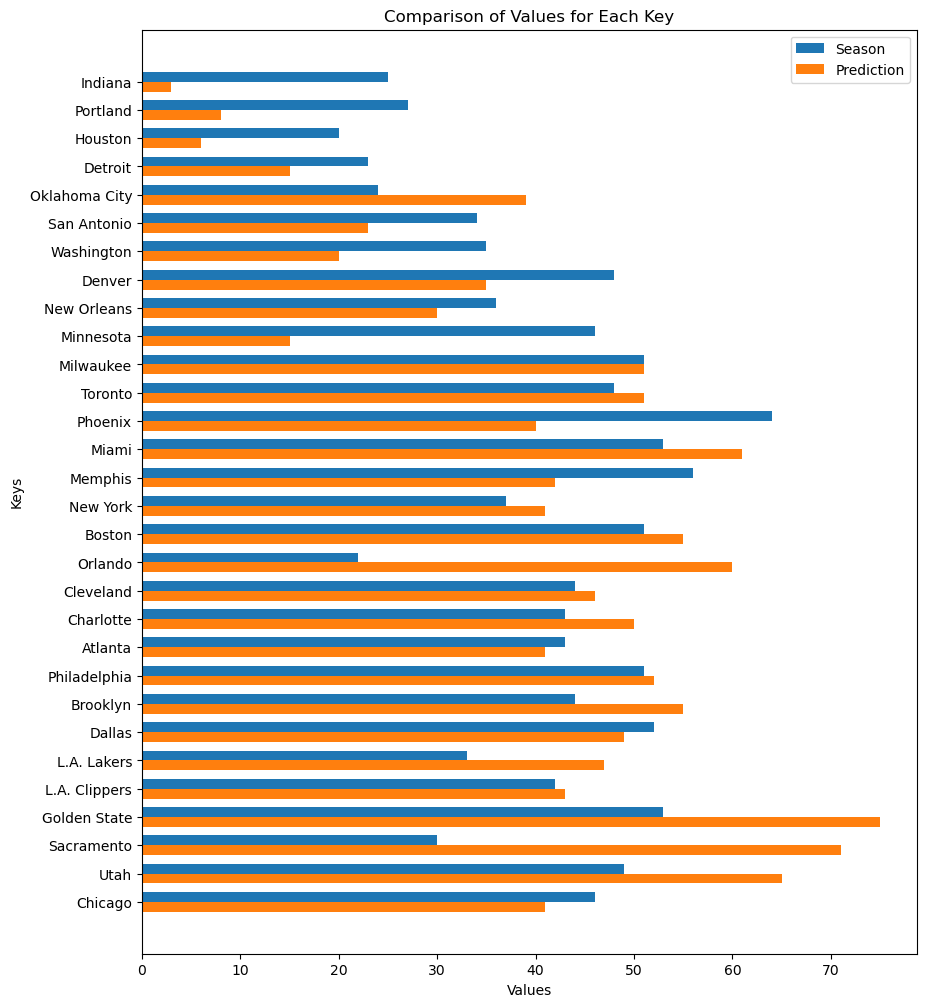

In [202]:
# Plotting final number of wins for each team

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))

keys = list(wins_per_team.keys())
values_dict1 = list(wins_per_team.values())
values_dict2 = list(wins_per_team_pred_1.values())

bar_height = 0.35
index = range(len(keys))

plt.barh([i + bar_height for i in index], values_dict1, height=bar_height, label='Season')

plt.barh(index, values_dict2, height=bar_height, label='Prediction')

plt.ylabel('Keys')
plt.xlabel('Values')
plt.title('Comparison of Values for Each Key')
plt.yticks([i + bar_height/2 for i in index], keys)
plt.legend()

**The prediction of all games outcome is at a solid almost 0.7 level, considering the unpredictability of sport, however all season number of wins is very wrong in some cases, in others however, quite accurate too. It is possible that the effect of last 2 seasons data was influential for the final outcome.**

Now, the time factor will be taken into acount, i. e., performance of last 1, 5, 10 games and season form will be updated according to model predictions. 

In [203]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON',
       'HOME_TEAM_BREAK', 'VISITOR_TEAM_BREAK', 'HOME_TEAM_LAST_SEASON_W_PCT',
       'VISITOR_TEAM_LAST_SEASON_W_PCT', 'HOME_TEAM_2_SEASONS_AGO_W_PCT',
       'VISITOR_TEAM_2_SEASONS_AGO_W_PCT', 'HOME_TEAM_LAST_GAME_WON',
       'VISITOR_TEAM_LAST_GAME_WON', 'HOME_TEAM_LAST_5_GAMES_W_PCT',
       'VISITOR_TEAM_LAST_5_GAMES_W_PCT', 'HOME_TEAM_LAST_10_GAMES_W_PCT',
       'VISITOR_TEAM_LAST_10_GAMES_W_PCT', 'HOME_TEAM_HOME_W_PCT_NORM',
       'VISITOR_TEAM_AWAY_W_PCT_NORM', 'IS_PLAYOFF', 'HOME_TEAM_SEASON_FORM',
       'VISITOR_TEAM_SEASON_FORM', 'HOME_TEAM_WINS'],
      dtype='object')

In [204]:
before_rs2022=games.loc[(games['GAME_DATE_EST']<pd.to_datetime('2021-10-19'))]

before_rs2022.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,...,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM,HOME_TEAM_WINS
1865,2021-10-15,12100063,Chicago,Memphis,2022,5.0,2.0,0.43,0.53,0.33,...,0.8,0.6,0.8,0.4,1.36,0.68,0,1.0,0.50,1
1866,2021-10-15,12100066,Golden State,Portland,2022,3.0,2.0,0.54,0.58,0.23,...,0.8,0.0,0.8,0.3,1.48,0.64,0,1.0,0.00,1
1867,2021-10-15,12100065,San Antonio,Houston,2022,5.0,4.0,0.46,0.24,0.44,...,0.4,0.4,0.3,0.2,1.36,0.74,0,0.6,0.25,1
1868,2021-10-15,12100064,Milwaukee,Dallas,2022,2.0,2.0,0.64,0.58,0.83,...,0.4,0.6,0.5,0.6,1.51,0.74,0,0.2,1.00,0
1869,2021-10-15,12100060,Detroit,Philadelphia,2022,2.0,4.0,0.28,0.68,0.31,...,0.2,0.6,0.2,0.5,1.50,0.68,0,0.5,0.50,1


In [205]:
rs2022_dates = regular_season_2022['GAME_DATE_EST'].drop_duplicates().tolist()

rs2022_dates.reverse()

In [206]:
regular_season_2022.loc[regular_season_2022['GAME_DATE_EST']==rs2022_dates[100]]

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,...,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM,HOME_TEAM_WINS
1123,2022-01-29,22100750,Golden State,Brooklyn,2022,2.0,3.0,0.54,0.67,0.23,...,0.8,0.0,0.6,0.4,1.48,0.74,0,0.74,0.59,1
1124,2022-01-29,22100749,Memphis,Washington,2022,1.0,4.0,0.53,0.47,0.50,...,0.6,0.0,0.7,0.4,1.47,0.63,0,0.67,0.47,1
1125,2022-01-29,22100748,Miami,Toronto,2022,1.0,3.0,0.56,0.38,0.64,...,0.8,0.0,0.8,0.4,1.40,0.73,0,0.64,0.51,1
1126,2022-01-29,22100747,Philadelphia,Sacramento,2022,2.0,3.0,0.68,0.43,0.59,...,0.8,0.0,0.7,0.2,1.47,0.66,0,0.61,0.35,1
1127,2022-01-29,22100746,Dallas,Indiana,2022,3.0,1.0,0.58,0.47,0.61,...,0.6,0.0,0.7,0.3,1.35,0.66,0,0.58,0.35,1
1128,2022-01-29,22100745,New Orleans,Boston,2022,1.0,1.0,0.43,0.50,0.44,...,0.4,0.0,0.5,0.6,1.46,0.76,0,0.37,0.51,0


In [213]:
# Code snippet predicting season results day by day

%%time

rs2022_predicted=pd.DataFrame(columns=games.columns)

games_before=games.loc[games['GAME_DATE_EST']<pd.to_datetime('2021-04-15')].iloc[:300, :]

for date in rs2022_dates:
    
    rs2022_team_wins={}

    rs2022_team_matches={}
    
    games_current=games.loc[games['GAME_DATE_EST']==date]
    
    games_current=pd.concat([games_current, rs2022_predicted], ignore_index=True)
    
    games_current=pd.concat([games_current, games_before], ignore_index=True)
    
    # last game won
    
    for index, row in games_current.iterrows():
        
        if row['GAME_DATE_EST']==date:
    
            home=row['HOME_TEAM_ID']

            away=row['VISITOR_TEAM_ID']

            if index<games_current.shape[0]:

                for index_2, row_2 in games_current.iloc[index+1:].iterrows():

                    if home==row_2['HOME_TEAM_ID']:

                        if row_2['HOME_TEAM_WINS']==1:

                            games_current.at[index, 'HOME_TEAM_LAST_GAME_WON']=1

                        else:

                            games_current.at[index, 'HOME_TEAM_LAST_GAME_WON']=0

                        break

                    if home==row_2['VISITOR_TEAM_ID']:

                        if row_2['HOME_TEAM_WINS']==1:

                            games_current.at[index, 'HOME_TEAM_LAST_GAME_WON']=0

                        else:

                            games_current.at[index, 'HOME_TEAM_LAST_GAME_WON']=1

                        break

                for index_3, row_3 in games_current.iloc[index+1:].iterrows():

                    if away==row_3['HOME_TEAM_ID']:

                        if row_3['HOME_TEAM_WINS']==1:

                            games_current.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=1

                        else:

                            games_current.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=0

                        break

                    if away==row_3['VISITOR_TEAM_ID']:

                        if row_3['HOME_TEAM_WINS']==1:

                            games_current.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=0

                        else:

                            games_current.at[index, 'VISITOR_TEAM_LAST_GAME_WON']=1

                        break

    # last 5 games
                    
    for index, row in games.iterrows():
        
        if row['GAME_DATE_EST']==date:

            home=row['HOME_TEAM_ID']

            home_score=0

            away=row['VISITOR_TEAM_ID']

            away_score=0

            i=0

            if index<games.shape[0]:

                for index_2, row_2 in games.iloc[index+1:].iterrows():

                    if home==row_2['HOME_TEAM_ID']:

                        if row_2['HOME_TEAM_WINS']==1:

                            home_score+=0.2

                        i+=1

                    if home==row_2['VISITOR_TEAM_ID']:

                        if row_2['HOME_TEAM_WINS']==0:

                            home_score+=0.2

                        i+=1

                    if i==5:

                        break

                for index_3, row_3 in games_current.iloc[index+1:].iterrows():

                    if away==row_3['HOME_TEAM_ID']:

                        if row_3['HOME_TEAM_WINS']==1:

                            away_score+=0.2

                        i+=1

                    if away==row_3['VISITOR_TEAM_ID']:

                        if row_3['HOME_TEAM_WINS']==0:

                            away_score+=0.2

                        i+=1

                    if i==10:

                        break

                games.at[index, 'HOME_TEAM_LAST_5_GAMES_W_PCT']=home_score

                games.at[index, 'VISITOR_TEAM_LAST_5_GAMES_W_PCT']=away_score

                if index==26400:

                    break
                
    # last 10 games
    
    for index, row in games_current.iterrows():
        
        if row['GAME_DATE_EST']==date:
    
            home=row['HOME_TEAM_ID']

            home_score=0

            away=row['VISITOR_TEAM_ID']

            away_score=0

            i=0

            if index<games_current.shape[0]:

                for index_2, row_2 in games_current.iloc[index+1:].iterrows():

                    if home==row_2['HOME_TEAM_ID']:

                        if row_2['HOME_TEAM_WINS']==1:

                            home_score+=0.1

                        i+=1

                    if home==row_2['VISITOR_TEAM_ID']:

                        if row_2['HOME_TEAM_WINS']==0:

                            home_score+=0.1

                        i+=1

                    if i==10:

                        break

                for index_3, row_3 in games_current.iloc[index+1:].iterrows():

                    if away==row_3['HOME_TEAM_ID']:

                        if row_3['HOME_TEAM_WINS']==1:

                            away_score+=0.1

                        i+=1

                    if away==row_3['VISITOR_TEAM_ID']:

                        if row_3['HOME_TEAM_WINS']==0:

                            away_score+=0.1

                        i+=1

                    if i==20:

                        break

                games_current.at[index, 'HOME_TEAM_LAST_10_GAMES_W_PCT']=home_score

                games_current.at[index, 'VISITOR_TEAM_LAST_10_GAMES_W_PCT']=away_score
                
    for index, row in rs2022_predicted.iterrows():
            
        if row['HOME_TEAM_WINS']==1:
            
            if row['HOME_TEAM_ID'] in rs2022_team_wins.keys():
            
                rs2022_team_wins[row['HOME_TEAM_ID']]+=1
                                 
            else:
                
                rs2022_team_wins[row['HOME_TEAM_ID']]=1
                                                            
            if row['HOME_TEAM_ID'] in rs2022_team_matches.keys():
            
                rs2022_team_matches[row['HOME_TEAM_ID']]+=1
                                 
            else:
                
                rs2022_team_matches[row['HOME_TEAM_ID']]=1
                
            if row['VISITOR_TEAM_ID'] in rs2022_team_matches.keys():
            
                rs2022_team_matches[row['VISITOR_TEAM_ID']]+=1
                                 
            else:
                
                rs2022_team_matches[row['HOME_TEAM_ID']]=1
                                 
        else:
                                 
            if row['VISITOR_TEAM_ID'] in rs2022_team_wins.keys():
            
                rs2022_team_wins[row['VISITOR_TEAM_ID']]+=1
                                 
            else:
                
                rs2022_team_wins[row['VISITOR_TEAM_ID']]=1
                                                            
            if row['HOME_TEAM_ID'] in rs2022_team_matches.keys():
            
                rs2022_team_matches[row['HOME_TEAM_ID']]+=1
                                 
            else:
                
                rs2022_team_matches[row['HOME_TEAM_ID']]=1
                
            if row['VISITOR_TEAM_ID'] in rs2022_team_matches.keys():
            
                rs2022_team_matches[row['VISITOR_TEAM_ID']]+=1
                                 
            else:
                
                rs2022_team_matches[row['HOME_TEAM_ID']]=1
                                                            
    for index, row in games_current.iterrows():
                                                            
        try:
                                                            
            games_current.at[index, 'HOME_TEAM_SEASON_FORM'] = rs2022_team_wins[row['HOME_TEAM_ID']]/rs2022_team_matches[row['HOME_TEAM_ID']]                                          
                                 
        except:
                 
            games_current.at[index, 'HOME_TEAM_SEASON_FORM'] = 0.5
                                                            
        try:
                                                            
            games_current.at[index, 'VISITOR_TEAM_SEASON_FORM'] = rs2022_team_wins[row['VISITOR_TEAM_ID']]/rs2022_team_matches[row['VISITOR_TEAM_ID']]                                          

        except:
                 
            games_current.at[index, 'VISITOR_TEAM_SEASON_FORM'] = 0.5
                                                            
                                                            
    games_current=games_current.loc[games_current['GAME_DATE_EST']==date]                                                   
                                                            
    X_test_final = games_current.iloc[:,5:-1]
    
    X_test_final = np.asarray(X_test_final).astype(np.float64)

    y_pred_final = model.predict(X_test_final)

    y_pred_final = (y_pred_final > 0.4).astype(int)

    games_current['HOME_TEAM_WINS'] = y_pred_final
                                                                                                                   
    rs2022_predicted=pd.concat([rs2022_predicted, games_current], ignore_index=True)

1/1 [==============================] - 0s 95ms/step
CPU times: total: 6min 43s
Wall time: 10min 26s


In [214]:
rs2022_predicted.head(50)

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_BREAK,VISITOR_TEAM_BREAK,HOME_TEAM_LAST_SEASON_W_PCT,VISITOR_TEAM_LAST_SEASON_W_PCT,HOME_TEAM_2_SEASONS_AGO_W_PCT,...,HOME_TEAM_LAST_5_GAMES_W_PCT,VISITOR_TEAM_LAST_5_GAMES_W_PCT,HOME_TEAM_LAST_10_GAMES_W_PCT,VISITOR_TEAM_LAST_10_GAMES_W_PCT,HOME_TEAM_HOME_W_PCT_NORM,VISITOR_TEAM_AWAY_W_PCT_NORM,IS_PLAYOFF,HOME_TEAM_SEASON_FORM,VISITOR_TEAM_SEASON_FORM,HOME_TEAM_WINS
0,2021-10-19,22100001,Milwaukee,Brooklyn,2022,4.0,5.0,0.64,0.67,0.83,...,0.2,0.0,0.5,0.7,1.51,0.74,0,0.5,0.500000,1
1,2021-10-19,22100002,L.A. Lakers,Golden State,2022,5.0,4.0,0.58,0.54,0.78,...,0.0,0.0,0.6,0.5,1.39,0.68,0,0.5,0.500000,1
2,2021-10-20,22100008,Minnesota,Houston,2022,6.0,5.0,0.32,0.24,0.30,...,0.8,0.0,0.3,0.1,1.42,0.74,0,0.5,0.500000,1
3,2021-10-20,22100013,Portland,Sacramento,2022,5.0,6.0,0.58,0.43,0.44,...,0.0,0.0,0.5,0.2,1.56,0.66,0,0.5,0.500000,1
4,2021-10-20,22100011,Utah,Oklahoma City,2022,7.0,6.0,0.72,0.31,0.64,...,0.4,0.0,0.7,0.1,1.57,0.73,0,0.5,0.500000,1
5,2021-10-20,22100010,San Antonio,Orlando,2022,5.0,7.0,0.46,0.29,0.44,...,0.6,0.0,0.3,0.3,1.36,0.70,0,0.5,0.500000,1
6,2021-10-20,22100009,New Orleans,Philadelphia,2022,9.0,5.0,0.43,0.68,0.44,...,0.2,0.0,0.5,0.6,1.46,0.68,0,0.5,0.500000,1
7,2021-10-20,22100012,Phoenix,Denver,2022,7.0,6.0,0.71,0.65,0.41,...,0.6,0.0,0.9,0.8,1.27,0.65,0,0.5,0.500000,1
8,2021-10-20,22100007,Memphis,Cleveland,2022,5.0,5.0,0.53,0.31,0.50,...,0.4,0.0,0.6,0.3,1.47,0.69,0,0.5,0.500000,1
9,2021-10-20,22100005,New York,Boston,2022,5.0,5.0,0.57,0.50,0.31,...,0.8,0.0,0.5,0.7,1.39,0.76,0,0.5,0.500000,1


In [215]:
# Counting predicted wins for each team

wins_per_team_pred_2={}

for index, row in rs2022_predicted.iterrows():
    
    if row['HOME_TEAM_WINS']==1:
        
        if row['HOME_TEAM_ID'] in wins_per_team_pred_2.keys(): 
    
            wins_per_team_pred_2[row['HOME_TEAM_ID']]+=1
        
        else:
            
            wins_per_team_pred_2[row['HOME_TEAM_ID']]=1
            
    else:
        
        if row['VISITOR_TEAM_ID'] in wins_per_team_pred_2.keys(): 
    
            wins_per_team_pred_2[row['VISITOR_TEAM_ID']]+=1
        
        else:
            
            wins_per_team_pred_2[row['VISITOR_TEAM_ID']]=1
            
wins_per_team_pred_2

{'Milwaukee': 22,
 'L.A. Lakers': 54,
 'Minnesota': 60,
 'Portland': 59,
 'Utah': 59,
 'San Antonio': 66,
 'New Orleans': 39,
 'Phoenix': 1,
 'Memphis': 19,
 'New York': 62,
 'Detroit': 61,
 'Charlotte': 67,
 'Toronto': 72,
 'Golden State': 71,
 'Atlanta': 43,
 'Houston': 78,
 'Philadelphia': 56,
 'Washington': 64,
 'Indiana': 35,
 'Denver': 19,
 'Miami': 34,
 'Sacramento': 20,
 'Oklahoma City': 12,
 'L.A. Clippers': 31,
 'Brooklyn': 10,
 'Dallas': 57,
 'Cleveland': 27,
 'Boston': 7,
 'Orlando': 22,
 'Chicago': 3}

In [216]:
# Mean average error is much higher here

MAE=0

for key, value in wins_per_team.items():
    
    MAE+=abs(value-wins_per_team_pred_2[key])
    
MAE=round(MAE/30, 2)

MAE

23.2

In [217]:
len(wins_per_team_pred_2.keys())

30

In [228]:
target_2022_pred=rs2022_predicted['HOME_TEAM_WINS']

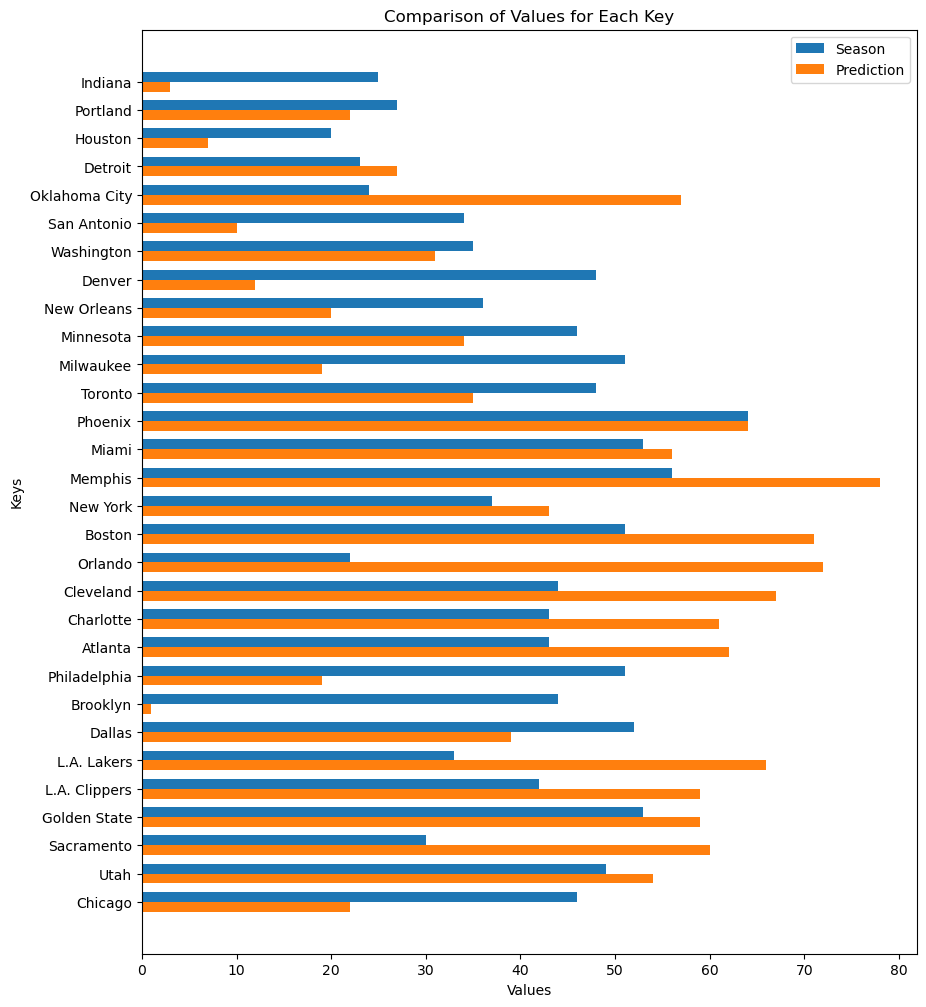

In [218]:
plt.figure(figsize=(10, 12))

keys = list(wins_per_team.keys())
values_dict1 = list(wins_per_team.values())
values_dict2 = list(wins_per_team_pred_2.values())

bar_height = 0.35
index = range(len(keys))

plt.barh([i + bar_height for i in index], values_dict1, height=bar_height, label='Season')

plt.barh(index, values_dict2, height=bar_height, label='Prediction')

plt.ylabel('Keys')
plt.xlabel('Values')
plt.title('Comparison of Values for Each Key')
plt.yticks([i + bar_height/2 for i in index], keys)
plt.legend()

# Visualization shows how sme teams were predicted to be great and others extremely bad, this could hppen due to the effects

# of temporality i. e. the prediction bias towards some teams at the beginning of the seasosn could pile up because of the

# importance of current form features.

In [234]:
accuracy_score(list(target_2022), list(target_2022_pred))

# Accuracy is almost as if the model guesses, once again, probably the temporal factor was the key, as making errors 

# at the beginning could have influenced further ones

0.5130081300813009